In [1]:
import MarineDNA_RAPIDS as md
import cudf
import cupy as cp
import cuml
from cuml import AgglomerativeClustering as aggclust
from cuml.decomposition import PCA
import numpy as np
import plotly.express as px

%load_ext autoreload
%autoreload 2

#import pandas as pd
#import sklearn as skl
#from sklearn.cluster import AgglomerativeClustering

In [2]:
file1 = "../../../Data/Flyer2018_16S_table_counts.tsv"
asvs1 = cudf.read_csv(file1, index_col=0, sep="\t")

In [3]:
# one random draw
ran_lo = md.ranRelPct(asvs1)
ran_lo

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,-2.403645,-3.496692,-3.727209,-4.187943,-3.801162,-4.803155,-9.052326,-4.320083,-3.431730,-4.194684,...,-9.119217,-8.399508,-9.483418,-7.640354,-9.159804,-9.329438,-8.576661,-9.891756,-10.557296,-7.829635
CN18Fc19_5_eDNA,-1.575974,-3.052707,-3.026556,-3.136238,-3.226363,-4.472141,-5.167275,-4.282305,-4.043360,-3.811418,...,-10.518419,-12.924056,-10.873013,-10.704024,-11.089179,-9.939172,-12.722249,-10.456014,-11.967450,-9.901321
CN18Fc21_6_eDNA,-1.885705,-3.114070,-3.235461,-3.223105,-3.597524,-4.367833,-4.574076,-4.007506,-3.729091,-3.963902,...,-11.193077,-9.981792,-12.480668,-12.183185,-11.699099,-9.989114,-10.423794,-11.169390,-11.365970,-9.812003
CN18Fc22_6_eDNA,-1.704987,-3.268448,-3.198817,-3.152957,-3.317004,-4.567326,-5.057135,-4.261689,-3.928141,-3.974796,...,-15.300472,-11.070850,-10.941014,-11.494262,-12.217405,-12.678232,-11.277525,-9.272199,-10.392376,-13.092275
CN18Fc24_6_eDNA,-1.895229,-3.421179,-3.117475,-3.140518,-3.366310,-4.228513,-5.071809,-4.117228,-3.779453,-4.127674,...,-11.842759,-10.242584,-13.322475,-11.099615,-13.208416,-13.690486,-12.347520,-15.046471,-10.430801,-12.245423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN18SESPkoa_SC42,-3.073012,-1.612679,-6.982784,-6.126017,-6.321422,-4.481326,-3.037884,-5.641363,-6.242570,-5.319481,...,-12.364863,-10.690893,-11.318630,-10.405087,-11.997184,-10.127476,-11.050955,-12.104308,-15.741267,-12.601198
CN18SESPkoa_SC44,-6.065674,-4.767128,-4.838625,-4.835430,-4.806905,-3.192336,-7.822520,-3.455377,-5.417533,-9.477781,...,-12.317243,-11.996893,-11.186212,-11.755468,-7.924764,-10.032586,-12.341618,-8.159744,-9.846180,-9.429285
CN18SESPkoa_SC45,-3.181458,-1.621144,-7.540421,-6.202269,-6.801961,-5.100381,-2.891568,-6.187955,-6.295924,-5.673765,...,-11.908582,-10.198639,-13.243974,-10.377341,-10.650070,-11.207537,-10.043896,-10.609497,-10.544539,-10.845153
CN18SESPkoa_SC47,-3.514018,-1.696276,-7.564393,-6.073875,-6.765544,-5.335505,-3.145718,-6.488583,-6.696137,-5.669438,...,-11.757817,-11.656414,-11.909488,-13.510401,-10.553098,-11.374002,-12.311905,-10.436171,-12.307211,-10.896395


In [11]:
import pandas as pd

In [14]:
# Hierarchical clustering of random log-odds draw
labels = md.doClustering(ran_lo, 3).to_numpy()
print(labels)
print()
print(pd.DataFrame(np.array(np.unique(labels, return_counts=True)).T))

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '2' '1'
 '0' '1' '0' '1' '0' '1' '1' '1']

   0   1
0  0  48
1  1  13
2  2   1


In [17]:
scores = md.doPCA(ran_lo)["scores"]

In [18]:
scores

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
CN18Fc12_8_eDNA,-23.360920,86.727296,-32.112993,12.786990,4.516322,8.038535,3.194441,5.317937,-14.793105,1.939197,...,4.601373,1.344092,-4.375873,3.614832,0.550122,-9.728506,4.278813,10.233968,10.758399,-4.532561
CN18Fc19_5_eDNA,22.013961,8.070951,-5.377835,-5.792239,9.536693,-8.120251,5.356261,-9.402973,1.428456,-5.706534,...,1.552592,-6.183833,15.114068,3.380318,-9.207020,1.156447,-19.849895,-12.757354,-6.721662,-10.952255
CN18Fc21_6_eDNA,27.321002,-11.514486,-10.878613,10.790086,-4.423984,-19.891222,3.412546,-3.579161,4.011766,-2.278182,...,-1.135700,7.743794,-7.006833,-0.531534,-5.072125,-4.365938,-4.343423,4.258516,-1.524603,-5.831055
CN18Fc22_6_eDNA,23.908178,-2.641698,-7.691718,4.003211,4.618135,-6.384526,2.820855,-11.208775,-6.101434,-4.143214,...,-22.054908,-7.268522,7.898803,-1.907235,15.933776,-14.375547,13.925920,-2.332636,4.681056,-0.365475
CN18Fc24_6_eDNA,25.722295,-1.908877,-10.063478,1.532398,6.381873,-5.948188,5.198451,-6.460926,2.590258,2.715832,...,-0.968755,-10.088433,-15.257178,-1.357411,-0.677807,-0.288052,-7.895325,-6.311777,-1.090825,-10.234842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN18SESPkoa_SC42,-65.301305,-21.664958,-4.585115,5.090508,-6.280347,4.351260,-5.665877,4.851400,24.252795,-14.718446,...,-1.729321,-6.278032,-7.098885,0.725472,-4.732697,-16.119474,10.382207,9.508762,-1.414426,-6.795397
CN18SESPkoa_SC44,-33.698760,91.644597,-11.147269,13.674331,-11.285293,-0.136780,-19.753630,9.921265,13.504199,10.858010,...,-1.991571,-4.070523,9.825430,-3.716357,-7.939829,-13.190116,-5.173563,3.789245,-6.351112,0.963303
CN18SESPkoa_SC45,-66.071602,-18.885596,-7.877093,-4.627298,-1.373586,2.122196,3.768538,-21.472165,10.812764,-6.954207,...,1.051824,0.444176,5.148561,0.960140,5.283224,7.461805,0.442847,-1.381873,5.507353,8.264151
CN18SESPkoa_SC47,-71.452429,-20.766807,-9.891773,0.658169,-4.518871,2.020216,4.042893,-6.810163,10.312223,9.300012,...,-0.863787,-7.378176,12.327546,-8.107918,2.210220,13.883941,-5.774056,-0.590601,-6.466185,-2.376361


In [20]:
# Visualize clustering on first 2 PC axes
scores = md.doPCA(ran_lo)["scores"]
scores["labels"] = labels
fig = px.scatter(
    scores,
    x = 0,
    y = 1,
    color = "labels"
)
fig.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
# Run sampleClust function n_rep times to assign n_clust clusters
n_clust = 8
n_rep = 10
 
cluster_samples = [md.doClustering(md.ranRelPct(asvs1), n_clust) for i in range(n_rep)]
cluster_samples = pd.DataFrame(cluster_samples).transpose()
cluster_samples

,0,1,2,3,4,5,6,7,8,9
0,3,3,3,7,3,3,3,7,3,7
1,0,4,6,6,0,2,0,6,0,0
2,4,0,0,5,5,7,6,2,5,2
3,0,0,0,5,0,2,2,6,5,6
4,4,0,0,5,0,7,2,6,5,2
...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,1,1,4,1,1,1
58,3,3,3,7,3,3,3,7,3,7
59,1,1,1,0,1,1,4,1,1,1
60,1,1,1,0,1,1,4,1,1,1


In [12]:
# A function to test if row pws[0] is the same cluster as row pws[1] in column 'col'
def isSameCluster(pws, df, col):
    return df.iloc[pws[0], col] == df.iloc[pws[1], col]

print(isSameCluster((1, 3), cluster_samples, 0))
print(isSameCluster((0, 3), cluster_samples, 0))

True
False


In [13]:
(62 * 61) / 2

1891.0

In [14]:
# Code to test if each pair of rows ((n^2 - 1)/2) = 1891) are the same for all columns
import itertools
pws_rows = itertools.combinations(range(cluster_samples.shape[0]), 2)

pws_same = pd.DataFrame([[isSameCluster(pair, cluster_samples, col) for col in range(cluster_samples.shape[1])] for pair in pws_rows])
pws_same

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1886,False,False,False,False,False,False,False,False,False,False
1887,False,False,False,False,False,False,False,False,False,False
1888,True,True,True,True,True,True,True,True,True,True
1889,True,True,True,True,True,True,True,True,True,True


In [15]:
# Function to return maximum number of values that are the same in a each row
def maxSame(row):
    return row.value_counts().max()

print(maxSame(pws_same.iloc[0, :]))
print(maxSame(pws_same.iloc[1890, :]))

10
10


In [16]:
# Code to return the percent of all values that were the same by row
num_same = [maxSame(pws_same.iloc[row, :]) for row in range(pws_same.shape[0])]
np.sum(num_same) * 100 / (pws_same.shape[0] * pws_same.shape[1])

92.00423056583818

In [17]:
# Putting it all together...

# Function to create n_rep draws of df and assign n_clusters and returns percent of draws that had same relative cluster assignments
def pctSame(df, n_clust, n_rep):
    if n_clust >= df.shape[0]:
        return 100
    
    def isSameCluster(pws, df, col):
        return df.iloc[pws[0], col] == df.iloc[pws[1], col]
    
    def maxSame(row):
        return row.value_counts().max()
    
    # cluster a random sample of logit(relative percentages)
    cluster_samples = [md.doClustering(md.ranRelPct(df), n_clust) for i in range(n_rep)]
    cluster_samples = pd.DataFrame(cluster_samples).transpose()
    # unique pairs of rows
    pws_rows = itertools.combinations(range(cluster_samples.shape[0]), 2)
    # identify pairs of samples that are in the same cluster (True) or in different clusters (False)
    pws_same = pd.DataFrame([[isSameCluster(pair, cluster_samples, col) for col in range(cluster_samples.shape[1])] for pair in pws_rows])
    # get the maximum number replicates that have the same value (True or False) for each sample
    num_same = [maxSame(pws_same.iloc[row, :]) for row in range(pws_same.shape[0])]
    # convert to percentage with maximum of same value across all replicates
    return np.sum(num_same) * 100 / (pws_same.shape[0] * pws_same.shape[1])

In [13]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 50
num_clust = np.arange(2, asvs1.shape[1] + 1)
pct_same = [pctSame(asvs1, x, n_rep) for x in num_clust]

CPU times: user 7min 49s, sys: 6.64 s, total: 7min 55s
Wall time: 7min 55s


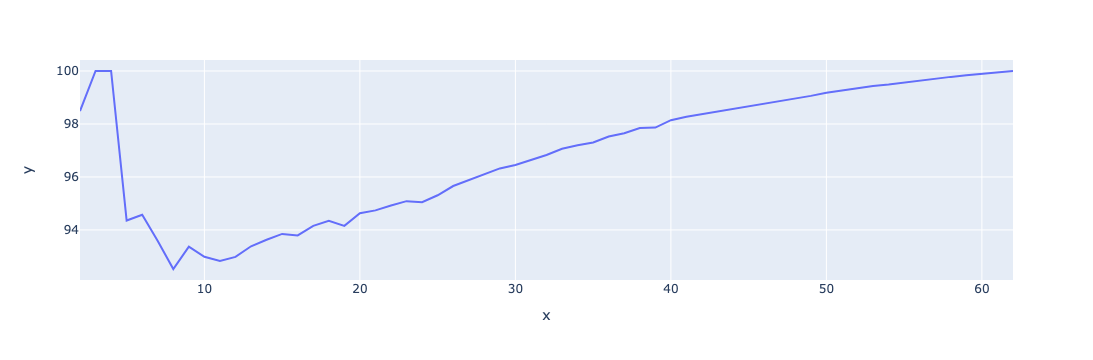

In [14]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust, y = pct_same)